## Desafío - Clasificación desde la econometría


<br>
<br>

Nombre: **Hugo Zúñiga**

Profesor: Josué Fredes

Generación: **G4**


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Descripción


En esta sesión trabajaremos con:
* sbp : Presión Sanguínea Sistólica.
* tobacco : Promedio tabaco consumido por día.
* ldl : Lipoproteína de baja densidad.
* adiposity : Adiposidad.
* famhist : Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types : Personalidad tipo A
* obesity : Obesidad.
* alcohol : Consumo actual de alcohol.
* age : edad.
* chd : Enfermedad coronaria. (dummy)


### Desafío 1: Preparar el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos southafricanheart.csv  y elimine la columna 'Unnamed: 0'

In [167]:
# Importo las librerías clásicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importo statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Defino parámetros de los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,6)

In [168]:
# Importo el archivo y borro la columna sobrante
df = pd.read_csv('southafricanheart.csv').drop('Unnamed: 0',axis=1)
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

### Desafío 2
A continuación se presenta el siguiente modelo a estimar:

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {famhist}}$$


Para ello ejecute los siguientes pasos:

1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
2. Utilice smf.logit para estimar el modelo.
3. Implemente una función inverse_logit que realize el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
    * ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    * ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.

grafique ambas curvas con lmplot



In [169]:
# Binarizo famhist a dummy, asignando 1 a la categoria de menor valor
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [170]:
# Present es menor, por lo q 1 indicará que presenta historial familiar y 0 que no
df['dummy'] = np.where(df['famhist'] == 'Present', 1, 0)
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd  \
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1   
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1   
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0   
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1   
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1   

   dummy  
0      1  
1      0  
2      1  
3      1  
4      1

In [172]:
# Creo el modelo con smf.logit 
m_logit = smf.logit('chd ~ dummy', df).fit()
m_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.057     
Dependent Variable: chd              AIC:              565.8944  
Date:               2019-07-10 21:40 BIC:              574.1655  
No. Observations:   462              Log-Likelihood:   -280.95   
Df Model:           1                LL-Null:          -298.05   
Df Residuals:       460              LLR p-value:      4.9371e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.1690    0.1431  -8.1687  0.0000  -1.4495  -0.8885
dummy          1.1690    0.2033   5.7514  0.0000   0.7706   1.5674
=================================================================

"""

In [173]:
# Creo la función inverse_logit para mapear la probabilidad, le doy el modelo, el eje y^ y la variable
def inverse_logit(m, y, var=0):
    estimate_y = m.params['Intercept'] + (m.params[y] * var)
    return 1 / (1 + np.exp(-estimate_y))

In [175]:
# ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
p1 = inverse_logit(m_logit, 'dummy', 1)
print(f'La prob. de un individuo con antecedentes familiares de tener una enfermedad coronaria es {round(p1,3)}')

La prob. de un individuo con antecedentes familiares de tener una enfermedad coronaria es 0.5


In [176]:
# ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
p2 = inverse_logit(m_logit, 'dummy', 0)
print(f'La prob. de un individuo sin antecedentes familiares de tener una enfermedad coronaria es {round(p2,3)}')

La prob. de un individuo sin antecedentes familiares de tener una enfermedad coronaria es 0.237


In [177]:
# ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
print(f"La diferencia entre la probabilidad de un individuo con y otro sin antecedentes es {round(p1-p2,3)}")

La diferencia entre la probabilidad de un individuo con y otro sin antecedentes es 0.263


In [178]:
# Hago el modelo con smf.ols
m_ols = smf.ols('chd ~ dummy', df).fit()
m_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.072   
Dependent Variable: chd              AIC:                593.1725
Date:               2019-07-10 21:44 BIC:                601.4437
No. Observations:   462              Log-Likelihood:     -294.59 
Df Model:           1                F-statistic:        36.86   
Df Residuals:       460              Prob (F-statistic): 2.66e-09
R-squared:          0.074            Scale:              0.21050 
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     0.2370     0.0279   8.4893   0.0000   0.1822   0.2919
dummy         0.2630     0.0433   6.0713   0.0000   0.1778   0.3481
-----------------------------------------------------------------
Omnibus:             768.898       Durbin-Watson:          1.961 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       58.778
Skew:                0.579         Prob(JB):               0.000 
Kurtosis:            1.692         Condition No.:          2     
=================================================================

"""

In [179]:
# Utilizando logit el modelo nos entrega un coeficiente de 1.1690, 
# al dividirlo por 4 nos daría un valor cercano al coeficiente del modelo ols
1.1690 / 4

0.29225

<Figure size 720x432 with 0 Axes>

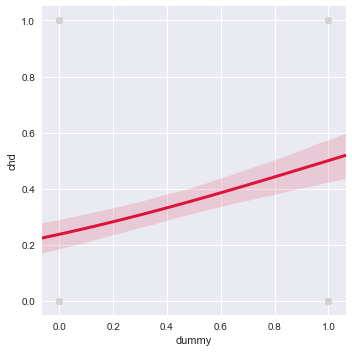

In [125]:
# Gráfico
decision_boundary = - m_logit.params['Intercept'] / m_logit.params['dummy']
decision_boundary

plt.figure()
sns.lmplot('dummy', 'chd', df, logistic=True, 
          line_kws={'color':'crimson','lw':3},
          scatter_kws={'color':'lightgrey', 'alpha':.5})

<Figure size 720x432 with 0 Axes>

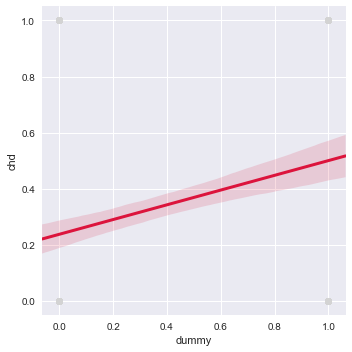

In [126]:
plt.figure()
sns.lmplot('dummy', 'chd', df, logistic=False, 
          line_kws={'color':'crimson','lw':3},
          scatter_kws={'color':'lightgrey', 'alpha':.5})

__Comentario:__ Ambos gráficos son similares 

### Desafío 3

Implemente un modelo con la siguiente forma

$$\log\left(\frac{p({ chd=1})}{1 - p({ chd=1})}\right)={{\beta }_{0} + \sum_{j=0}^N {\beta }_{j} \cdot {X}}$$



1. Depure el modelo manteniendo las variables con significancia estadística al 95%.
2. Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.


In [180]:
# Reviso las columnas del DF
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd', 'dummy'],
      dtype='object')

In [181]:
# Le paso al logit todas las variables 
m_logit2 = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + dummy + typea + obesity + alcohol + age', df).fit()
m_logit2.summary2()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2019-07-10 21:46 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
dummy          0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
=================================================================

"""

__R:__ Se puede determinar las variables que mantienen un 95% de significancia. Estas son: 
* `tobacco` Promedio tabaco consumido por día
* `ldl` Lipoproteína de baja densidad
* `dummy` Antecedentes familiares de enfermedades cardiácas
* `types` Personalidad tipo A
* `age` Edad

In [182]:
# Refactorizo el modelo sólo con estas 5 variables
m_logit3 = smf.logit('chd ~ tobacco + ldl + dummy + typea + age', df).fit()
m_logit3.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2019-07-10 21:47 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
dummy          0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
=================================================================

"""

__Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria__

__R:__ Se puede ver que de las variables con mayor significancia, la que tiene mayor peso es el historial familiar, seguido por el nivel de lipoproteína de baja densidad. También es relevante el consumo de tabaco y en menor medida la edad y la personalidad tipo A

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas
a probabilidades con inverse_logit . Los perfiles a estimar son los siguientes:
* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [153]:
# Con características similares a la muestra se entiene por los promedios
# Para esto lo primero que hago es crear un vector con los promedios de las variables
v_promedios = df.describe().loc['mean',['dummy','ldl','tobacco','age','typea']]
v_promedios

dummy       0.415584
ldl         4.740325
tobacco     3.635649
age        42.816017
typea      53.103896
Name: mean, dtype: float64

In [154]:
m_logit3.predict

<bound method Results.predict of <statsmodels.discrete.discrete_model.LogitResults object at 0x1c2ce3fa90>>

In [155]:
# Luego creo función que recibe el modelo y el vector a evaluar y que me retorne la probabilidad de lo que necesito
def predict_pr(m, v):
    y_pr = m.params['Intercept']
    for i,j in v.iteritems():
        y_pr += m.params[i] * j
    #print(f'El valor de y es {y_pr}')
    P = 1 / (1 + np.exp(-y_pr))
    #print(f'El valor de P(y) es {P}')
    return P

In [156]:
print(predict_pr(m_logit3, v_promedios))

0.29370927481586934


In [157]:
# Aunque también el modelo es capaz de retornar esta probabildiad recibiendo un vector
m_logit3.predict(v_promedios)

mean    0.293709
dtype: float64

* La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [158]:
# Para el nivel máximo calculo el valor máximo. Sólo cambio esta variable, sigo con los promedios del resto
v_ldl = v_promedios
v_ldl_max = df['ldl'].max()
v_ldl['ldl'] = v_ldl_max
v_ldl

dummy       0.415584
ldl        15.330000
tobacco     3.635649
age        42.816017
typea      53.103896
Name: mean, dtype: float64

In [161]:
# Ahora uso predict del modelo con este vector
print(f'La probabilidad de tener una enfermedad coronaria teniendo altos niveles de colesterol es {round(m_logit3.predict(v_ldl)[0],3)}')

La probabilidad de tener una enfermedad coronaria teniendo altos niveles de colesterol es 0.698


* La probabilidad de tener una enfemerdad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [162]:
# Ahora hacemos el mismo ejercicio anterior pero calculando el mínimo nivel de colesterol

v_ldl_min = df['ldl'].min()
v_ldl['ldl'] = v_ldl_min
v_ldl

dummy       0.415584
ldl         0.980000
tobacco     3.635649
age        42.816017
typea      53.103896
Name: mean, dtype: float64

In [164]:
print(f'La probabilidad de tener una enfermedad coronaria teniendo bajos niveles de colesterol es {round(m_logit3.predict(v_ldl)[0],3)}')

La probabilidad de tener una enfermedad coronaria teniendo bajos niveles de colesterol es 0.184


__Commentario:__ Dada la diferencia entre tener alto y bajo el colesterol podemos reafirmar la importancia de esta variable en el modelo